In [11]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import pySPM
print(pySPM.__version__)

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

import os
from IPython import display

import pims
import trackpy as tp


0.2.21


In [12]:
from pims import FramesSequence, Frame

class sxmReader(FramesSequence):

    def __init__(self, filename):
        self.filename = filename
        self._len = len(os.listdir(filename)) # however many frames there will be
        self._dtype = np.float64 # the numpy datatype of the frames
        self._frame_shape = np.array([512, 512]) # the shape, like (512, 512), of an
                             # individual frame -- maybe get this by
                             # opening the first frame
        # Do whatever setup you need to do to be able to quickly access
        # individual frames later.
        self.frame_names = [os.path.join(filename, image) for image in sorted(os.listdir(filename))]
        
    def get_frame(self, i):
        # Access the data you need and get it into a numpy array.
        # Then return a Frame like so:
        S = pySPM.SXM(self.frame_names[i])
        my_numpy_array = S.get_channel('Z').pixels
        my_numpy_array = (my_numpy_array - np.amin(my_numpy_array)) / (np.amax(my_numpy_array) - np.amin(my_numpy_array))
        return Frame(my_numpy_array, frame_no=i)

    def __len__(self):
     return self._len

    @property
    def frame_shape(self):
     return self._frame_shape

    @property
    def pixel_type(self):
     return self._dtype

In [13]:
frames = sxmReader('gate_dep')

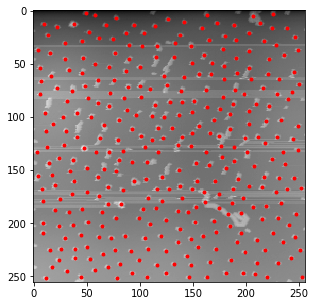

In [14]:
f = tp.locate(frames[1], 7, minmass=0.1)
tp.annotate(f, frames[1], plot_style={'markersize' : 2})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a9a0b90>,
      dtype=object)

<Figure size 720x360 with 0 Axes>

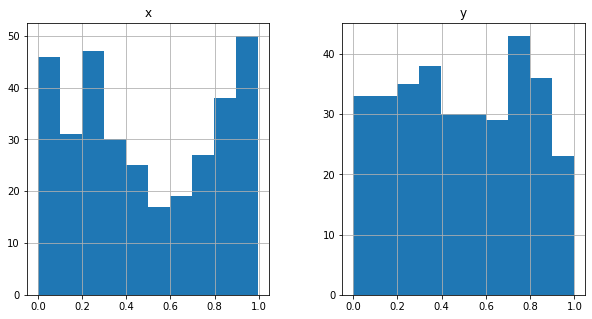

In [15]:
plt.figure()
tp.subpx_bias(f)

1


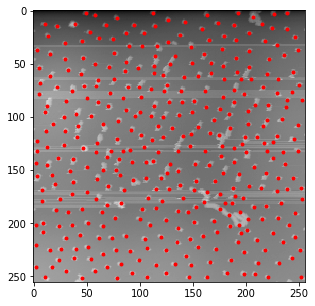

2


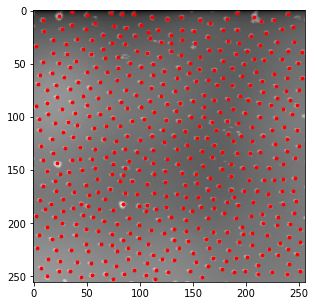

3


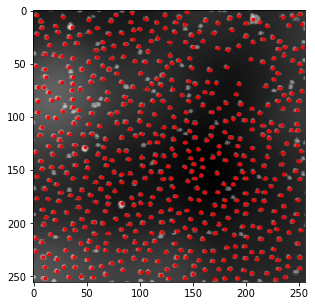

4


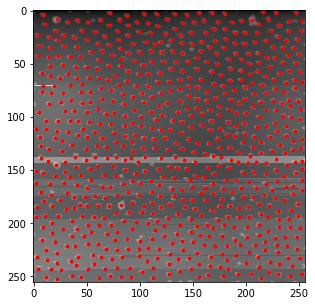

5


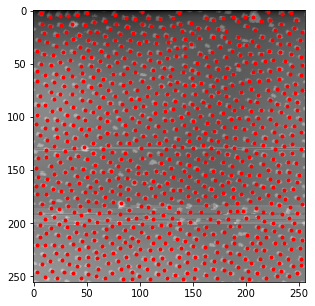

6


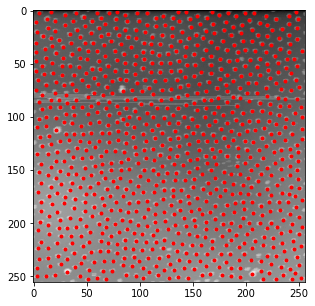

7


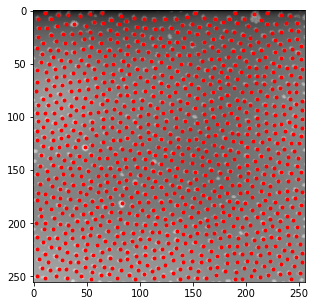

8


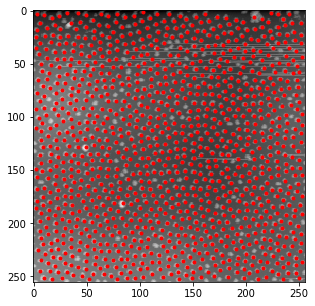

9


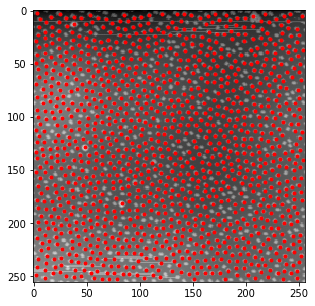

In [16]:
for i in range(1, len(frames) - 1):
    print(i)
    x = tp.locate(frames[i], 5, minmass=0.01)
    tp.annotate(x, frames[i], plot_style={'markersize' : 2})

In [17]:
batch = tp.batch(frames[:], 5, minmass=0.01)

Frame 10: 983 features
